# Analyzing Spotify's Top 50 Songs from 2010-2019

This dataset was acquired through [Kaggle](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) and it goes through the top 50 songs by year in the world by Spotify. There are many ways in which we can be analyzing the data, but in this instance, I'd love to understand the trends that we are seeing with music throughout the years and see if we can derive insights as to what type of music we'll be able to predict that will be popular in 2020. 

### Reading the Dataset

Here is a sample of what this dataset looks like below:

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("top10s.csv", engine='python')

df.set_index(['Unnamed: 0'], inplace=True)
df.sample(5)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
485,OK - Spotify Version,Robin Schulz,dance pop,2017,122,81,65,-6,13,58,189,12,6,69
112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop,2012,117,68,86,-4,7,92,188,8,5,76
86,We Found Love,Rihanna,barbadian pop,2011,128,77,73,-4,11,60,215,3,4,61
420,Desire,Years & Years,dance pop,2016,126,78,71,-5,30,64,203,30,6,58
35,Try Sleeping with a Broken Heart,Alicia Keys,hip pop,2010,111,82,50,-5,13,55,249,16,11,62


In [4]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


We will be focusing on just a few of these key features and **omitting**: 
* **Duration (dur)** - Anecdotally speaking, listeners don't choose certain songs over others based on the length.
* **Speechiness (spch)** - According to Spotify, Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. This is irrelevant for our analysis since there's actually not a lot of rap music in this dataset.
* **Liveness (live)** - Detects audience in the recording. I wouldn't expect people to listen to live music on Spotify with the audience cheering in the background when a studio version exists.
* **dB** - There is a low variation in results for dB, which makes it difficult to derive insights.
* **Popularity (pop)**: Couldn't find the methodology for this feature and since these are all songs that are supposed to be "popular", I decided to leave it out.

In [64]:
df[df['artist'] == 'Kanye West']

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
64,Monster,Kanye West,chicago rap,2011,125,69,63,-6,67,10,379,0,20,73


# Finding Year over Year trends with Music

For the first part of this analysis, it will be interesting to group audio features that have to do with energy and dancing together and see how these features have been trending over the years. The description for the features are outlined in the [Spotify Web API Guidance](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) page. 
* **Beats Per Minute**: The tempo of the song. The average BPM is at 119. 

* **Energy**: a measure from 0 to 100, and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **Danceability**: describes the suitability of a track for dancing. This is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0 is least danceable and 100 is most danceable.

* **Acousticness**: a confidence measure from 0 to 100 of whether the track is acoustic. 100 represents high confidence that the track is acoustic. Acoustic music, based on this entry from [Wikipedia](https://en.wikipedia.org/wiki/Acoustic_music), "When music is labeled acoustic, unplugged, or unwired, the assumption seems to be that other types of music are cluttered by technology and overproduction and therefore aren't as pure". So one would think that these two values would coincide with one another.

* **Valence**: a measure from 0 to 100 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (for example happy, cheerful, euphoric), while tracks with low valence sound more negative (for example sad, depressed, angry).

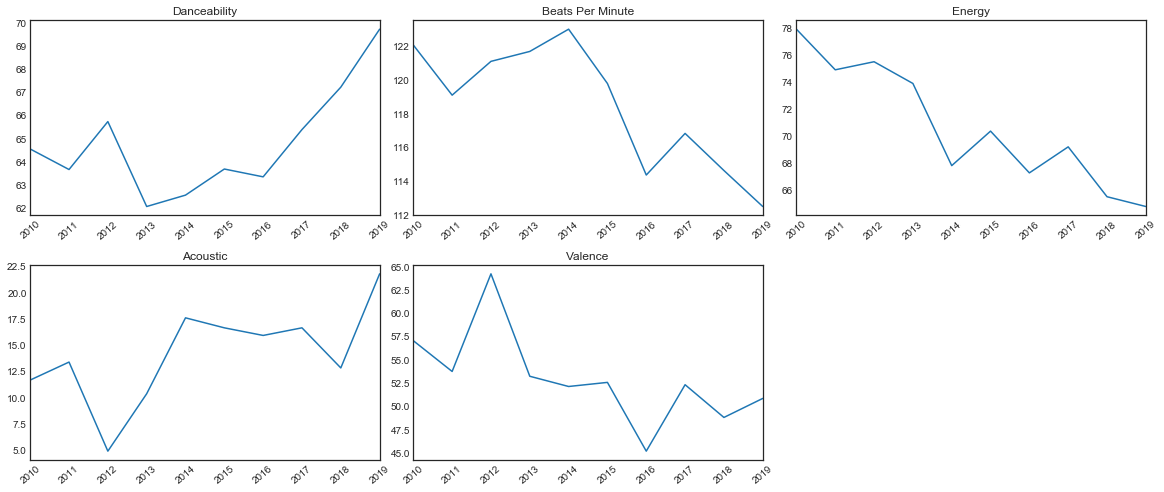

In [65]:
df_pivot = df.pivot_table(index='year', aggfunc='mean')
plt.style.use('seaborn-white')
plt.figure(figsize=(16, 10))

plt.subplot(331)
df_pivot['dnce'].plot.line()
plt.title('Danceability')
plt.xlabel('')
#plt.ylabel('danceability')
plt.xticks(rotation=40)

plt.subplot(332)
df_pivot['bpm'].plot.line()
plt.title('Beats Per Minute')
plt.xlabel('')
#plt.ylabel('BPM')
plt.xticks(rotation=40)

plt.subplot(333)
df_pivot['nrgy'].plot.line()
plt.title('Energy')
plt.xlabel('')
#plt.ylabel('Energy')
plt.xticks(rotation=40)

plt.subplot(334)
df_pivot['acous'].plot.line()
plt.title('Acoustic')
plt.xlabel('')
#plt.ylabel('acoustic')
plt.xticks(rotation=40)

plt.subplot(335)
df_pivot['val'].plot.line()
plt.title('Valence')
plt.xlabel('')
#plt.ylabel('valence')
plt.xticks(rotation=40)

#plt.subplot(336)
#df_pivot['pop'].plot.line()
#plt.title('Popularity')
#plt.xlabel('')
#plt.ylabel('popularity')
#plt.xticks(rotation=40)

plt.tight_layout()

### Let's keep dancing... by dropping the BPM?

This is a little surprising to see. As "Danceability" has gone up to its highest levels in 2019, BPM and Energy of music has trended down to its lowest. To help conceptualize BPM, 120 BPM's is the double of 60 BPM's which is the sound of a clock. Listeners are more comfortable with listening to sounds with tempos around this digit as we have internalized the sound of the division of a minute in a clock. With that, BPM under 113 is not very fast. 

Below are a few of the songs in 2019 that fit the profile of high danceability, and lower BPM and Energy:

In [8]:
df[(df['year'] == 2019) & (df['dnce'] > 69) & (df['bpm'] < 113) & (df['nrgy'] < 65)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
578,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,98,62,86,-6,9,67,204,15,8,92
584,Only Human,Jonas Brothers,boy band,2019,94,50,80,-6,6,87,183,11,7,87
595,No Guidance (feat. Drake),Chris Brown,dance pop,2019,93,45,70,-7,16,14,261,12,15,81


What's interesting to note is that these are all artists that are well-known names and have been mentioned on this list during the early parts of this decade. They can be individuals leading the charge in ushering this new change in music. 

### Going back to a purer sound of music

Furthermore, a preference for an "acoustic" sound seems to be more on the rise, and quite drastically, from where it was a few years ago. 

Text(0.5, 1.0, 'Acoustic Ratings by Year')

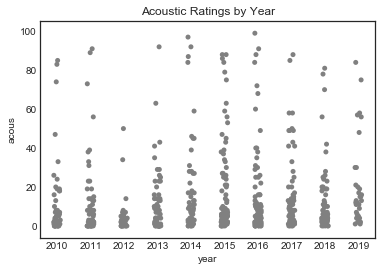

In [74]:
sns.stripplot(x='year',y='acous', data=df, jitter=True, color='gray')
plt.title("Acoustic Ratings by Year")

The strip plot above shows that there is more balance in 2019 to songs that have varying levels of "acoustic" ratings. Notice how the others years tend to cluster more towards the bottom of the graph.

### What will the overall mood be in 2020?

Under valence, we saw a major spike in positive sounding music in 2012:

In [79]:
print('Valence Ratings in 2012:')
df_12 = df[df['year'] == 2012]
avg_val_12 = round(df_12['val'].mean(),2)
median_val_12 = round(df_12['val'].median(),2)
print('Mean: ' + str(avg_val_12))
print('Median: ' + str(median_val_12))

Valence Ratings in 2012:
Mean: 64.17
Median: 68.0


And saw a massive downturn in valence (happy, upbeat music) in 2016:

In [80]:
print('Valence Ratings in 2016:')
df_16 = df[df['year'] == 2016]
avg_val_16 = round(df_16['val'].mean(),2)
median_val_16 = round(df_16['val'].median(),2)
print('Mean: ' + str(avg_val_16))
print('Median: ' + str(median_val_16))

Valence Ratings in 2016:
Mean: 45.15
Median: 43.0


Could it be due to socio-economic factors that played into the overall mood changing? The biggest thing that comes to mind is the US Presidential Elections took place in both of those years, however that would be something that is out of the scope for this analysis. Nonetheless it would be interesting to keep in mind as we head into 2020. 

##### Happiest & Saddest Songs of 2012

Highest rated songs by valence: 

In [90]:
df_12.sort_values(by='val', ascending=False).head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
135,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,127,96,72,-4,38,95,206,1,9,59
112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop,2012,117,68,86,-4,7,92,188,8,5,76
109,What Makes You Beautiful,One Direction,boy band,2012,125,79,73,-2,6,89,200,1,7,78
129,The One That Got Away,Katy Perry,dance pop,2012,134,80,69,-4,16,88,227,0,4,67
106,Locked Out of Heaven,Bruno Mars,pop,2012,144,70,73,-4,31,87,233,5,4,79


Lowest rated songs by valence:

In [91]:
df_12.sort_values(by='val').head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
107,Paradise,Coldplay,permanent wave,2012,140,59,45,-7,8,20,279,5,3,79
105,Titanium (feat. Sia),David Guetta,dance pop,2012,126,79,60,-4,13,30,245,7,10,80
124,Boyfriend,Justin Bieber,canadian pop,2012,97,55,72,-6,13,33,171,4,5,71
134,Diamonds,Rihanna,barbadian pop,2012,92,71,56,-5,11,39,225,0,5,61
123,Some Nights,fun.,baroque pop,2012,108,74,67,-7,9,39,277,2,5,72


##### Happiest & Saddest Songs of 2016

Highest rated songs by valence: 

In [87]:
df_16.sort_values(by='val', ascending=False).head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
390,Me Too,Meghan Trainor,dance pop,2016,124,69,93,-6,48,84,181,10,10,73
440,BURNITUP!,Janet Jackson,dance pop,2016,123,71,83,-7,31,83,250,5,18,31
392,Ain't Your Mama,Jennifer Lopez,dance pop,2016,120,68,76,-6,7,82,218,5,23,72
394,Toothbrush,DNCE,dance pop,2016,105,79,55,-6,47,82,232,12,13,72


Lowest rated songs by valence:

In [89]:
df_16.sort_values(by='val').head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0
404,Runnin' (Lose It All),Naughty Boy,tropical house,2016,139,85,32,-6,48,8,213,1,8,69
423,Wish That You Were Here - From “Miss Peregrine...,Florence + The Machine,art pop,2016,94,57,37,-6,13,12,403,72,3,57
437,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,86,17,39,-13,11,14,214,91,3,36
364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84


## Predictions for 2020

The biggest thing that we see is the energy and BPM of the music will continue to lower, while danceability continues to rise. A few examples of songs that would stay on trend for 2020 will be:

In [75]:
df[(df['dnce'] > 69) & (df['bpm'] < 113) & (df['nrgy'] < 65) & (df['acous'] > 20)]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,,,,,,,,,,,,,,
143,Just Give Me a Reason (feat. Nate Ruess),P!nk,dance pop,2013,95,55,78,-7,13,44,243,35,5,81
269,Thinking out Loud,Ed Sheeran,pop,2015,79,45,78,-6,18,59,282,47,3,84
383,Starving,Hailee Steinfeld,dance pop,2016,100,62,73,-4,11,51,182,38,6,78
442,Behind Your Back,Nelly Furtado,canadian latin,2016,98,47,80,-10,7,69,228,25,4,18
445,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86
564,Miss You (with Major Lazer & Tory Lanez),Cashmere Cat,downtempo,2018,100,64,75,-5,11,45,186,25,9,64
573,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,99
